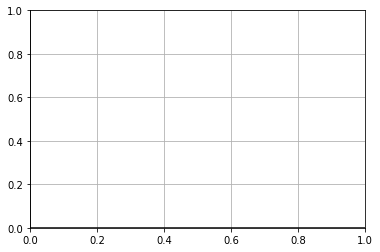

In [34]:
import sympy as smp
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

1.39

In [2]:
t = smp.symbols('t', real=True)
x = t
y = t ** 2
dist = smp.sqrt((x - 2)**2 + (y - 0.5)**2)
tsols = smp.solve(smp.diff(dist, t), t)[0]
x.subs([(t, tsols)]), y.subs([(t, tsols)])

(1.00000000000000, 1.00000000000000)

1.40

In [ ]:
t = smp.symbols('t', real=True)
x = 2 * smp.cos(t)
y = smp.sin(t)
dist = smp.sqrt((x - 0.75)**2 + (y - 0)**2)
tsols = smp.solve(smp.diff(dist, t), t)[0]
x.subs([(t, tsols)]), y.subs([(t, tsols)])

(1.00000000000000, -0.866025403784439)

11.2 1 + til 14

In [76]:
x, y, t = smp.symbols('x y t', real=True)
def tangentleq(xt, yt, tval):
    dy = smp.diff(yt)
    dx = smp.diff(xt)
    tan = (y - yt - (x - xt) * dy/dx).subs([(t, tval)]).simplify()
    d2ydx2 = (smp.diff(dy/dx)/dx).subs([(t, tval)]).simplify()
    return tan, d2ydx2

In [ ]:
probs = [(2 * smp.cos(t), 2 * smp.sin(t), smp.pi / 4),
         (smp.sin(2 * smp.pi * t), smp.cos(2 * smp.pi * t), - 1 / 6),
         (4 * smp.sin(t), 2 * smp.cos(t), smp.pi / 4),
         (1 / (1 + t), t / (t - 1), 2)
         ]

In [ ]:
for p in probs:
    print(tangentleq(*p))

(x + y - 2*sqrt(2), -sqrt(2))
(-x/tan(0.166666666666667*pi) + y - 1/sin(0.166666666666667*pi), -1/cos(0.333333333333333*pi)**3)
(x/2 + y - 2*sqrt(2), -sqrt(2)/4)
(-9*x + y + 1, 108)


11.2 15 + til 6

In [ ]:
f, g = smp.symbols('f g', cls=smp.Function)
x = f(t)
y = g(t)
def p2(xe, ye, tval):
    xt = smp.solve(xe, x)[0]
    yt = smp.solve(ye, y)[0]
    return (smp.diff(yt) / smp.diff(xt)).subs([(t, tval)])

In [ ]:
probs = [(x**3 + 2*t**2 - 9, 2*y**3 - 3*t**2 - 4, 2),
         (x + 2 * smp.sqrt(x) ** 3 - t**2 - t, y*smp.sqrt(t + 1) + 2*t*smp.sqrt(y) - 4 , 0)
]

p2(*probs[1])

In [ ]:
smp.diff(x + 2 * smp.sqrt(x) ** 3 - t**2 - t, t)
smp.diff(y*smp.sqrt(t + 1) + 2*t*smp.sqrt(y) - 4, t)

t*Derivative(g(t), t)/sqrt(g(t)) + sqrt(t + 1)*Derivative(g(t), t) + 2*sqrt(g(t)) + g(t)/(2*sqrt(t + 1))

In [ ]:
smp.solve(t + 2 * t **1.5, t)

[0.0]

11.2. 21 - 24

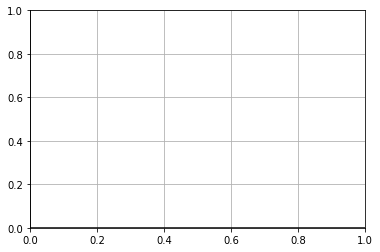

In [25]:
def graph(x, y, l, h):
    tval = np.linspace(l, h, 100)
    xl = smp.lambdify([t], x)
    yl = smp.lambdify([t], y)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(xl(tval), yl(tval))


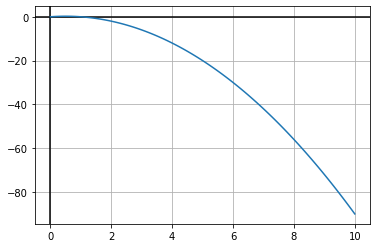

In [5]:
graph(t, t - t**2, 0, 10)

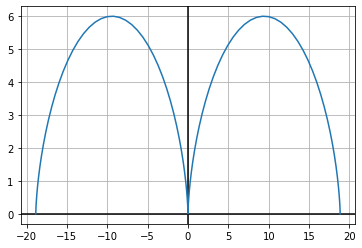

In [6]:
graph(3 * (t - smp.sin(t)), 3 * (1 - smp.cos(t)), -2 * np.pi, 2 * np.pi)

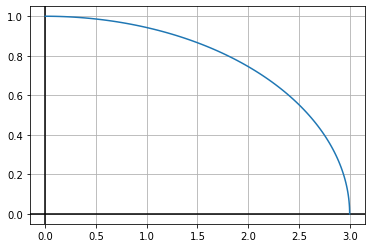

In [ ]:
graph(3 * smp.cos(t), smp.sin(t), 0, 0.5 * np.pi)

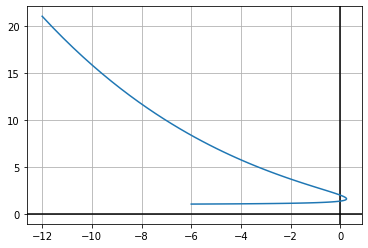

In [12]:
graph(t - t**2, 1 + smp.E ** (- t), -3, 3)

In [16]:
x, y, t, a, b = smp.symbols('x y t a b', real=True)


In [11]:
smp.integrate((a**2) * (1 - smp.cos(t)) * smp.diff(t - smp.sin(t)), (t, 0, 2*smp.pi))

3*pi*a**2

In [15]:
smp.integrate((t - t**2)*(1 + smp.E** (- t)), (t, 0, 1))

-5/6 + 3*exp(-1)

In [18]:
smp.integrate(b * smp.sin(t) * smp.diff(a * smp.cos(t), t), (t, 0, 0.5 * smp.pi))

-0.25*pi*a*b

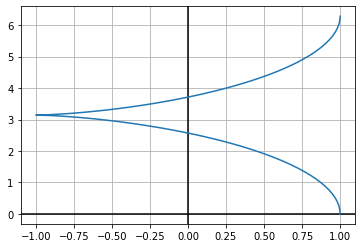

In [23]:
graph(smp.cos(t), t + smp.sin(t), 0, 2 * np.pi)

In [35]:
def dist(x, y, l, h):
    f = smp.lambdify([t], ((smp.diff(x)**2 + smp.diff(y)**2)**0.5).simplify())
    return quad(f, l, h)[0]

In [37]:
dist(smp.cos(t), t + smp.sin(t), 0, np.pi)

4.000000000000013

In [38]:
dist(0.5*t**2, 1/3 * (2*t + 1)**1.5, 0, 4)

12.0

In [39]:
dist(8*smp.cos(t) + 8 * t * smp.sin(t), 8*smp.sin(t) - 8 * t * smp.cos(t), 0, np.pi / 2)

9.869604401089358

In [40]:
np.pi ** 2

9.869604401089358

In [51]:
def rdist(x, y, l, h, xa):
    f = 2 * smp.pi * (smp.diff(x)**2 + smp.diff(y)**2)**0.5
    f = f*y if xa else f*x
    f = smp.lambdify([t], f.simplify())
    return quad(f, l, h)[0]

In [52]:
rdist(smp.cos(t), 2 + smp.sin(t), 0, 2 * np.pi, True)

78.95683520871486

In [53]:
8 * np.pi ** 2

78.95683520871486

In [54]:
rdist(2 *t, t + 1, 0 , 1, True)

21.07444419312218

In [55]:
3 * np.pi * np.sqrt(5)

21.07444419312218

In [65]:
def centroid(x, y, l, h):
    dl = (smp.diff(x)**2 + smp.diff(y)**2)**0.5
    L = dist(x, y, l, h)
    xl = smp.lambdify([t], (x * dl).simplify())
    yl = smp.lambdify([t], (y * dl).simplify())
    return np.array([quad(xl, l, h)[0], quad(yl, l, h)[0]]) / L

In [66]:
centroid(smp.cos(t) + t * smp.sin(t), smp.sin(t) - t * smp.cos(t), 0, np.pi * 0.5)

array([1.38801023, 0.43170841])

In [67]:
12/np.pi*(1 - 2/np.pi)

1.3880102267893815

In [68]:
-2 + 24/np.pi**2

0.4317084074161066

In [69]:
centroid(smp.cos(t), t + smp.sin(t), 0, np.pi)

array([0.33333333, 1.80825932])

In [71]:
dist(smp.cos(2 * t), smp.sin(2 * t), 0, np.pi/2)

3.141592653589793

In [72]:
dist(smp.sin(np.pi * t), smp.cos(np.pi * t), -0.5, 1/2)

3.1415926535897896

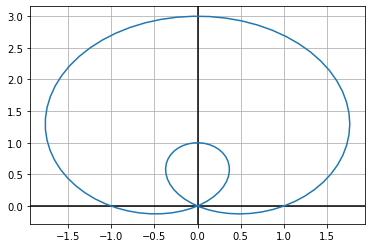

In [75]:
graph((1 + 2 * smp.sin(t)) *smp.cos(t), (1 + 2 * smp.sin(t)) *smp.sin(t), 0, 2 * np.pi)

In [81]:
tangentleq((1 + 2 * smp.sin(t)) *smp.cos(t), (1 + 2 * smp.sin(t)) *smp.sin(t), 4 * smp.pi/3)

(4*x + 3*sqrt(3)*x + y - 4, -792 - 456*sqrt(3))